# MDAnalysis UGM 2023 - ProLIF live demo

## Info

Simulation of D(2) dopamine receptor in complex with risperidone taken from [GPCRmd](https://www.gpcrmd.org/dynadb/dynamics/id/925/).

- 500ns, 4fs timestep, 2500 frames
- NVT ensemble
- Other molecules: water, POPC, chloride, sodium

## Instructions

Run the `fetch-data.sh` script first to download the trajectories, then run this notebook.

## Useful links

- [Documentation](https://prolif.readthedocs.io/)
- [GitHub](https://github.com/chemosim-lab/ProLIF)
- [Paper](https://doi.org/10.1186/s13321-021-00548-6)

In [1]:
from pprint import pprint

import MDAnalysis as mda
import nglview as nv
import numpy as np
import prolif as plf
from MDAnalysis.topology import guessers
from pathlib import Path


DATA = Path.cwd() / "data"
assert DATA.exists()
RAW = DATA / "raw"
assert RAW.exists()

/Users/cbouysset/miniforge3/envs/ugm2023/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
TOP = RAW / "16622_dyn_925.psf"
TRAJ = RAW / "16623_trj_925.xtc"
assert TOP.exists()
assert TRAJ.exists()

In [3]:
# load topology and trajectory
u = mda.Universe(TOP, TRAJ)

# guess elements
elements = np.array([guessers.guess_atom_element(x) for x in u.atoms.names])
u.add_TopologyAttr("elements", elements)
u.atoms.types = elements

# create selections for the ligand and protein
ligand_selection = u.select_atoms("resname 8NU")
protein_selection = u.select_atoms(
    "protein and byres around 20.0 group ligand",
    ligand=ligand_selection,
)
ligand_selection, protein_selection

(<AtomGroup with 59 atoms>, <AtomGroup with 3372 atoms>)

In [4]:
nv.show_mdanalysis(ligand_selection + protein_selection)

NGLWidget(max_frame=2499)

In [5]:
ligand_mol = plf.Molecule.from_mda(ligand_selection)
protein_mol = plf.Molecule.from_mda(protein_selection)

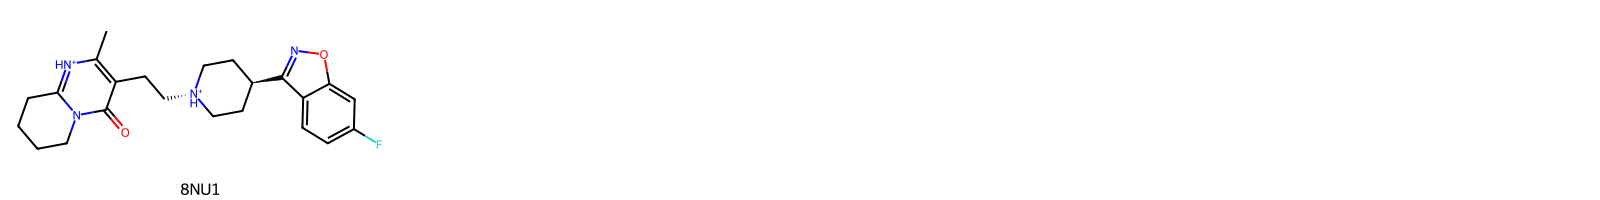

In [6]:
plf.display_residues(ligand_mol, size=(400, 200))

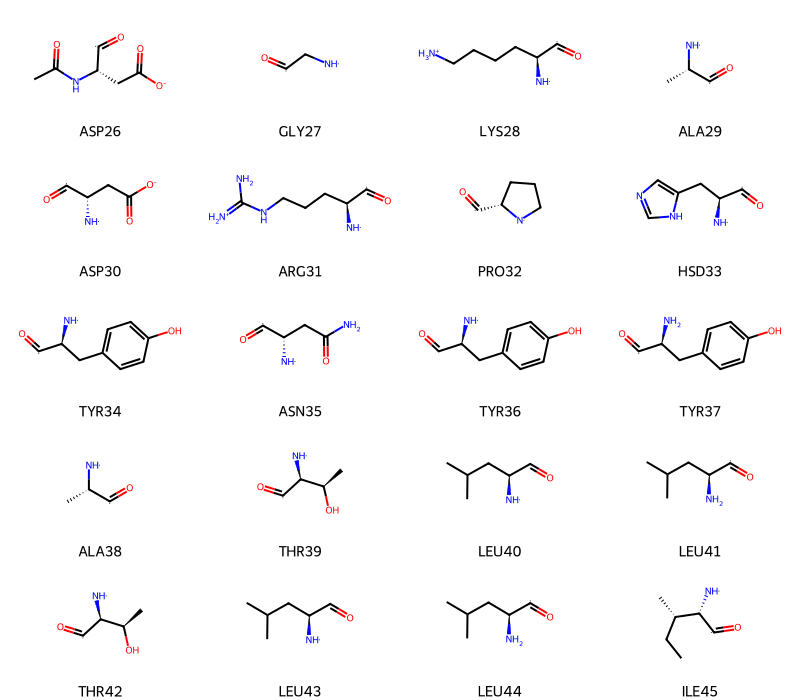

In [7]:
plf.display_residues(protein_mol, slice(20))

In [8]:
fp = plf.Fingerprint(
    interactions=[
        "Hydrophobic",
        "HBDonor",
        "HBAcceptor",
        "PiStacking",
        "Anionic",
        "Cationic",
        "CationPi",
        "PiCation",
        "VdWContact",
    ],
    count=True,
)
# run on all the trajectory and save
# fp.run(u.trajectory, ligand_selection, protein_selection)
# fp.to_pickle(DATA / "fingerprint.pkl")

In [9]:
fp = plf.Fingerprint.from_pickle(DATA / "fingerprint.pkl")
pprint(fp.ifp[833][("8NU1", "ASP114")])

{'Cationic': ({'distance': 3.142737940214605,
               'indices': {'ligand': (51,), 'protein': (8,)},
               'parent_indices': {'ligand': (51,), 'protein': (1224,)}},
              {'distance': 3.0315177472661845,
               'indices': {'ligand': (51,), 'protein': (9,)},
               'parent_indices': {'ligand': (51,), 'protein': (1225,)}}),
 'HBDonor': ({'DHA_angle': 172.41164123533602,
              'distance': 3.0315177472661845,
              'indices': {'ligand': (51, 52), 'protein': (9,)},
              'parent_indices': {'ligand': (51, 52), 'protein': (1225,)}},),
 'VdWContact': ({'distance': 3.1506668635006756,
                 'indices': {'ligand': (12,), 'protein': (8,)},
                 'parent_indices': {'ligand': (12,), 'protein': (1224,)}},
                {'distance': 3.0315177472661845,
                 'indices': {'ligand': (51,), 'protein': (9,)},
                 'parent_indices': {'ligand': (51,), 'protein': (1225,)}},
                {'distance

In [10]:
df = fp.to_dataframe(count=False, dtype=int)
df

ligand             8NU1                                                 \
protein           VAL87       MET88       VAL91                  LEU94   
interaction Hydrophobic Hydrophobic Hydrophobic VdWContact Hydrophobic   
Frame                                                                    
0                     0           0           0          0           1   
1                     0           0           0          0           0   
2                     0           0           0          0           1   
3                     0           0           0          0           1   
4                     0           0           0          0           1   
...                 ...         ...         ...        ...         ...   
2495                  0           0           1          1           0   
2496                  0           0           0          0           0   
2497                  0           0           1          0           0   
2498                  0           0           1          0           0   
2499                  0           0           1          0           0   

ligand                                                              ...  \
protein                      GLU95                          TRP100  ...   
interaction VdWContact Hydrophobic Cationic VdWContact Hydrophobic  ...   
Frame                                                               ...   
0                    0           0        0          0           0  ...   
1                    0           0        0          0           0  ...   
2                    0           0        0          0           0  ...   
3                    0           0        0          0           0  ...   
4                    0           0        0          0           0  ...   
...                ...         ...      ...        ...         ...  ...   
2495                 0           0        0          0           0  ...   
2496                 0           0        0          0           0  ...   
2497                 0           0        0          0           0  ...   
2498                 0           0        0          0           0  ...   
2499                 0           0        0          0           0  ...   

ligand                                                                \
protein          TYR408                           SER409      THR412   
interaction Hydrophobic HBAcceptor VdWContact VdWContact Hydrophobic   
Frame                                                                  
0                     1          0          0          0           1   
1                     1          0          1          0           1   
2                     1          0          1          0           0   
3                     1          0          1          1           1   
4                     1          0          0          0           0   
...                 ...        ...        ...        ...         ...   
2495                  1          0          1          0           1   
2496                  0          0          1          0           1   
2497                  0          0          0          0           1   
2498                  0          0          0          0           0   
2499                  1          0          0          0           1   

ligand                                                               
protein                                TYR416                        
interaction HBAcceptor VdWContact Hydrophobic HBAcceptor VdWContact  
Frame                                                                
0                    0          1           0          0          0  
1                    0          1           0          0          0  
2                    0          1           0          0          0  
3                    0          1           0          0          0  
4                    0          0           0          0          0  
...                ...        ...         ...       

In [11]:
# hide interaction types
df.drop(["Hydrophobic", "VdWContact"], level="interaction", axis=1)

ligand          8NU1                                                    \
protein        GLU95  ASP114              THR119     SER193     SER197   
interaction Cationic HBDonor Cationic HBAcceptor HBAcceptor HBAcceptor   
Frame                                                                    
0                  0       0        1          0          0          0   
1                  0       0        1          0          0          0   
2                  0       0        1          0          0          0   
3                  0       0        1          0          0          0   
4                  0       0        1          0          0          0   
...              ...     ...      ...        ...        ...        ...   
2495               0       1        1          0          0          0   
2496               0       1        1          0          0          0   
2497               0       1        1          0          0          0   
2498               0       1        1          0          0          0   
2499               0       1        1          0          0          0   

ligand                                                              
protein         TRP386     PHE390     TYR408     THR412     TYR416  
interaction PiStacking PiStacking HBAcceptor HBAcceptor HBAcceptor  
Frame                                                               
0                    0          0          0          0          0  
1                    0          0          0          0          0  
2                    0          0          0          0          0  
3                    0          0          0          0          0  
4                    0          0          0          0          0  
...                ...        ...        ...        ...        ...  
2495                 0          0          0          0          0  
2496                 0          0          0          0          0  
2497                 0          1          0          0          0  
2498                 0          0          0          0          0  
2499                 0          0          0          0          0  

[2500 rows x 11 columns]

In [12]:
# show only one protein residue
df.xs("ASP114", level="protein", axis=1)

ligand             8NU1                            
interaction Hydrophobic HBDonor Cationic VdWContact
Frame                                              
0                     0       0        1          1
1                     0       0        1          1
2                     0       0        1          1
3                     0       0        1          1
4                     0       0        1          1
...                 ...     ...      ...        ...
2495                  0       1        1          1
2496                  0       1        1          1
2497                  0       1        1          1
2498                  0       1        1          1
2499                  0       1        1          1

[2500 rows x 4 columns]

In [13]:
# show only an interaction type (PiStacking)
df.xs("PiStacking", level="interaction", axis=1)

ligand    8NU1       
protein TRP386 PHE390
Frame                
0            0      0
1            0      0
2            0      0
3            0      0
4            0      0
...        ...    ...
2495         0      0
2496         0      0
2497         0      1
2498         0      0
2499         0      0

[2500 rows x 2 columns]

In [14]:
# show interactions in a specific frame
frame = 444
frame_df = df.xs(frame, axis=0)
frame_df[frame_df != 0]

ligand  protein  interaction
8NU1    TRP100   Hydrophobic    1
        ASP114   Cationic       1
                 VdWContact     1
        VAL115   Hydrophobic    1
        CYS118   Hydrophobic    1
                 VdWContact     1
        ILE122   Hydrophobic    1
        ILE184   Hydrophobic    1
        PHE189   Hydrophobic    1
                 VdWContact     1
        SER193   HBAcceptor     1
                 VdWContact     1
        SER197   VdWContact     1
        PHE198   Hydrophobic    1
        PHE382   Hydrophobic    1
        TRP386   Hydrophobic    1
                 VdWContact     1
        PHE389   Hydrophobic    1
                 VdWContact     1
        PHE390   Hydrophobic    1
                 PiStacking     1
        HSD393   Hydrophobic    1
Name: 444, dtype: int64

In [15]:
# average number of interactions for each type
df.T.groupby(level="interaction").sum().T.mean()

interaction
Cationic        1.3016
HBAcceptor      0.0756
HBDonor         0.8448
Hydrophobic    12.0432
PiStacking      0.4484
VdWContact      8.6052
dtype: float64

In [16]:
# same but median
df.T.groupby(level="interaction").sum().T.apply(np.median)

interaction
Cationic        1.0
HBAcceptor      0.0
HBDonor         1.0
Hydrophobic    12.0
PiStacking      0.0
VdWContact      9.0
dtype: float64

In [17]:
# 10 residues most frequently interacting with the ligand
(
    df.T.groupby(level=["ligand", "protein"])
    .sum()
    .T.astype(bool)
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .to_frame("%")
    .T
    * 100
)

ligand    8NU1                                                               
protein CYS118 TRP386 PHE390 ASP114 PHE198 PHE389 SER197 VAL115 THR412 PHE382
%        100.0  99.96  99.64  98.88  95.88  95.28  94.92  87.52  84.16   76.4

In [18]:
# percentage of the trajectory where each interaction type is present
(
    df.T.groupby(level="interaction")
    .sum()
    .T.astype(bool)
    .mean()
    .sort_values(ascending=False)
    .to_frame(name="%")
    .T
    * 100
)

interaction,Hydrophobic,VdWContact,Cationic,HBDonor,PiStacking,HBAcceptor
%,100.0,100.0,98.56,84.48,43.08,7.44


<Axes: xlabel='Frame'>

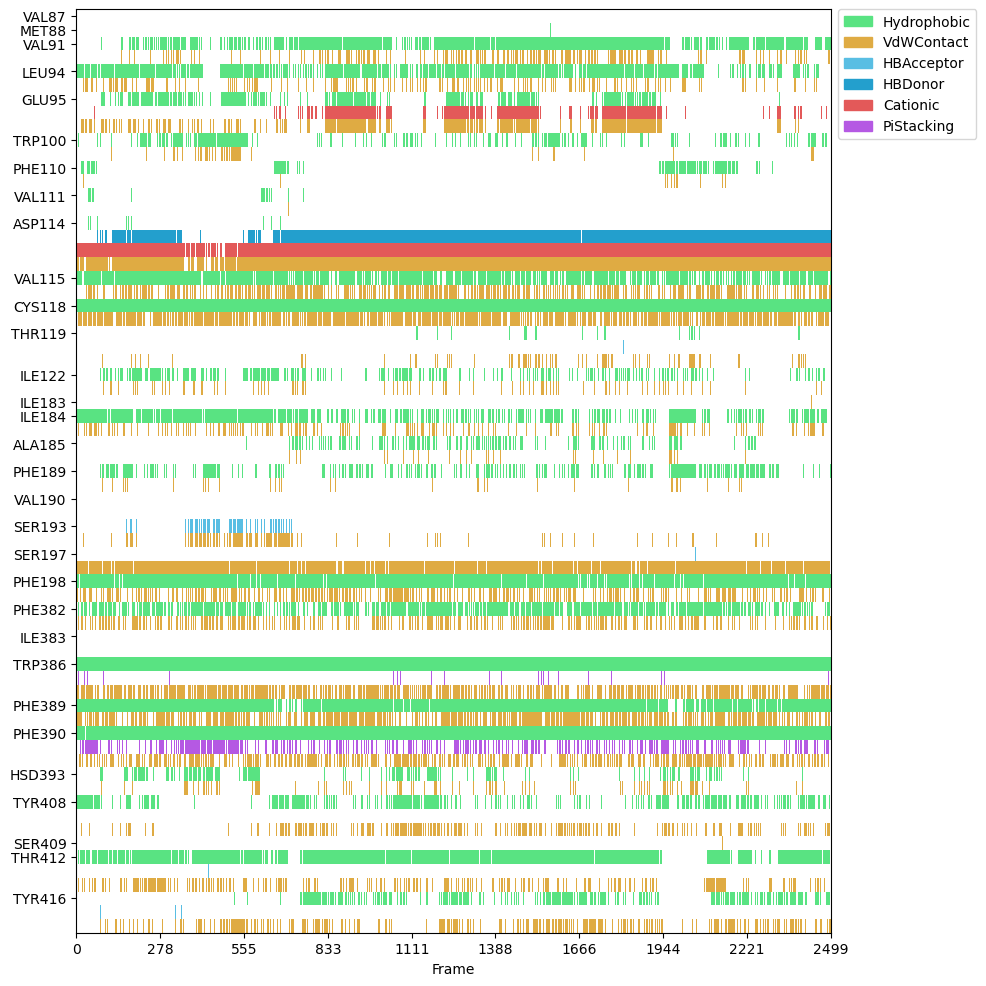

In [19]:
# %matplotlib ipympl

fp.plot_barcode(figsize=(10, 10))

In [20]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from rdkit import DataStructs

# Tanimoto similarity matrix based on binary IFP
bitvectors = fp.to_bitvectors()
similarity_matrix = []
for bv in bitvectors:
    similarity_matrix.append(DataStructs.BulkTanimotoSimilarity(bv, bitvectors))
similarity_matrix = pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)
similarity_matrix

Frame,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
Frame,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.739130,0.608696,0.750000,0.608696,0.680000,0.695652,0.600000,0.760000,0.555556,...,0.448276,0.482759,0.620690,0.518519,0.592593,0.448276,0.551724,0.535714,0.370370,0.576923
1,0.739130,1.000000,0.650000,0.809524,0.500000,0.652174,0.750000,0.500000,0.538462,0.520000,...,0.520000,0.444444,0.592593,0.423077,0.500000,0.461538,0.576923,0.500000,0.375000,0.608696
2,0.608696,0.650000,1.000000,0.750000,0.666667,0.750000,0.600000,0.571429,0.608696,0.521739,...,0.400000,0.384615,0.538462,0.416667,0.565217,0.400000,0.520000,0.440000,0.304348,0.416667
3,0.750000,0.809524,0.750000,1.000000,0.590909,0.739130,0.681818,0.583333,0.615385,0.538462,...,0.538462,0.464286,0.666667,0.444444,0.576923,0.481481,0.592593,0.518519,0.346154,0.560000
4,0.608696,0.500000,0.666667,0.590909,1.000000,0.666667,0.523810,0.650000,0.608696,0.590909,...,0.400000,0.384615,0.600000,0.478261,0.565217,0.458333,0.461538,0.440000,0.428571,0.478261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.448276,0.461538,0.400000,0.481481,0.458333,0.538462,0.541667,0.407407,0.400000,0.428571,...,0.666667,0.640000,0.666667,0.625000,0.576923,1.000000,0.592593,0.640000,0.458333,0.560000
2496,0.551724,0.576923,0.520000,0.592593,0.461538,0.653846,0.538462,0.413793,0.500000,0.433333,...,0.592593,0.517241,0.600000,0.555556,0.571429,0.592593,1.000000,0.629630,0.357143,0.500000
2497,0.535714,0.500000,0.440000,0.518519,0.440000,0.576923,0.520000,0.392857,0.482759,0.413793,...,0.708333,0.615385,0.642857,0.818182,0.750000,0.640000,0.629630,1.000000,0.500000,0.600000


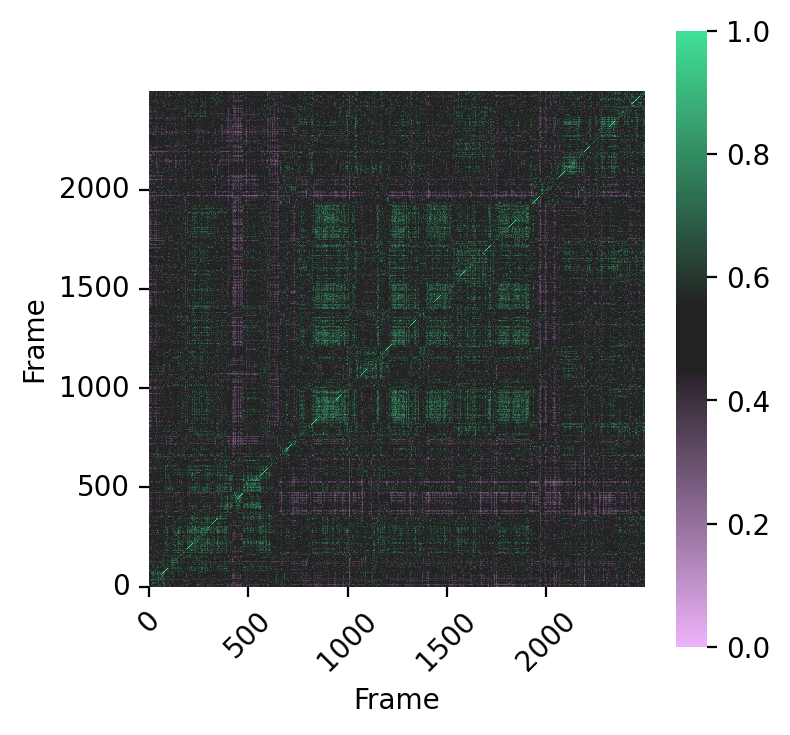

In [21]:
# display heatmap
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
colormap = sns.diverging_palette(
    300, 145, s=90, l=80, sep=30, center="dark", as_cmap=True
)
sns.heatmap(
    similarity_matrix,
    ax=ax,
    square=True,
    cmap=colormap,
    vmin=0,
    vmax=1,
    center=0.5,
    xticklabels=500,
    yticklabels=500,
)
ax.invert_yaxis()
plt.yticks(rotation="horizontal")
plt.xticks(rotation=45);

In [22]:
from kmedoids import KMedoids

kmedoids = KMedoids(n_clusters=2, random_state=0xac1d1c)
kmedoids.fit(1 - similarity_matrix.values)
kmedoids.medoid_indices_

array([ 907, 1109], dtype=uint64)

In [23]:
# show interactions that differ between both medoids
data = df.iloc[kmedoids.medoid_indices_]
data = data.loc[:, data.nunique() > 1]
data

ligand             8NU1                                              \
protein           VAL91       GLU95                          TRP100   
interaction Hydrophobic Hydrophobic Cationic VdWContact Hydrophobic   
Frame                                                                 
907                   1           1        1          1           0   
1109                  0           0        0          0           1   

ligand                                                                \
protein          ILE122     ILE184      PHE189     PHE198     PHE390   
interaction Hydrophobic VdWContact Hydrophobic VdWContact PiStacking   
Frame                                                                  
907                   0          0           0          1          0   
1109                  1          1           1          0          1   

ligand                                                                 \
protein          HSD393      TYR408                THR412      TYR416   
interaction Hydrophobic Hydrophobic VdWContact VdWContact Hydrophobic   
Frame                                                                   
907                   0           0          0          0           1   
1109                  1           1          1          1           0   

ligand                  
protein                 
interaction VdWContact  
Frame                   
907                  1  
1109                 0

In [24]:
# seek specific frame before plotting
frame = kmedoids.medoid_indices_[0]
u.trajectory[frame]
ligand_mol = plf.Molecule.from_mda(ligand_selection)
protein_mol = plf.Molecule.from_mda(protein_selection)

fp.plot_3d(ligand_mol, protein_mol, frame=kmedoids.medoid_indices_[0])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [25]:
# compare both in 3D
from prolif.plotting.complex3d import Complex3D

frame = kmedoids.medoid_indices_[0]
u.trajectory[frame]
ligand_mol = plf.Molecule.from_mda(ligand_selection)
protein_mol = plf.Molecule.from_mda(protein_selection)
comp3D = Complex3D.from_fingerprint(fp, ligand_mol, protein_mol, frame=frame)

frame = kmedoids.medoid_indices_[1]
u.trajectory[frame]
ligand_mol = plf.Molecule.from_mda(ligand_selection)
protein_mol = plf.Molecule.from_mda(protein_selection)
other_complex = Complex3D.from_fingerprint(fp, ligand_mol, protein_mol, frame=frame)

view = comp3D.compare(other_complex, size=(1080, 600))
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [26]:
# same in 2D (ligplot-like)
from IPython.display import display
from ipywidgets import Output, HBox

outputs = []
for frame in kmedoids.medoid_indices_:
    capture = Output()
    with capture:
        display(fp.plot_lignetwork(ligand_mol, kind="frame", frame=frame))
    outputs.append(capture)

HBox(outputs)

In [27]:
# aggregate all interactions and only show the ones occuring more than 30% of the time
fp.plot_lignetwork(ligand_mol, kind="aggregate", threshold=0.3)